<a href="https://colab.research.google.com/github/sakusakupanda03/BachelorThesis/blob/main/notebooks/02_preprocess_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

path = "/content/drive/MyDrive/sotsuron/data"

In [ ]:
btc = pd.read_pickle(path + "/02_intermediate/btc.pickle")
eth = pd.read_pickle(path + "/02_intermediate/eth.pickle")

In [ ]:
display(btc.head())
display(eth.head())

,market-cap,market-price,avg-block-size,avg-confirmation-time,hash-rate,difficulty,miners-revenue,transaction-fees,fees-usd-per-transaction,n-unique-addresses,n-transactions
Timestamp,,,,,,,,,,,
2019-08-13,NaN,11386.26,1.189569,80.451740,NaN,9.985348e+12,2.333942e+07,75.090478,NaN,566410.0,370747.0
2019-08-14,2.035380e+11,10858.12,1.139713,24.389041,7.346340e+07,9.985348e+12,2.075148e+07,58.701704,1.688709,554189.0,359997.0
2019-08-15,1.917811e+11,10016.96,1.066147,20.704373,7.339249e+07,9.985348e+12,2.040381e+07,53.847970,1.517867,538837.0,355644.0
2019-08-16,1.796285e+11,10302.17,1.035985,36.214050,7.445615e+07,9.985348e+12,2.017521e+07,51.335260,1.615817,533245.0,323625.0
2019-08-17,1.793580e+11,10359.44,0.996770,18.593019,7.445615e+07,9.985348e+12,1.681876e+07,35.382502,1.264809,441149.0,288256.0


,export-EtherPrice,export-MarketCap,export-BlockSize,export-BlockTime,export-NetworkHash,export-BlockDifficulty,export-GasUsed,export-TransactionFee,export-AverageDailyTransactionFee,export-DailyActiveEthAddress,export-verified-contracts
Date(UTC),,,,,,,,,,,
2019-08-13,208.62,22386.986820,20533,13.19,183968.9350,2321.781,40869092248,442189111129727963975,0.13,287455,95
2019-08-14,186.49,20014.770104,21869,13.12,182841.3072,2287.502,45760235706,423557030430017902254,0.11,286631,83
2019-08-15,188.24,20205.128921,20987,13.23,182862.8915,2316.621,45183685444,495115214127142572663,0.14,263277,79
2019-08-16,185.41,19903.899875,21163,13.07,182737.0873,2286.198,43127230037,380932535910019507834,0.10,296649,85
2019-08-17,185.69,19936.491937,18717,13.07,186578.2674,2342.395,40334874395,285605634390667735596,0.08,255735,44


# Data type

In [ ]:
btc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1095 entries, 2019-08-13 to 2022-08-11
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   market-cap                1090 non-null   float64
 1   market-price              1095 non-null   float64
 2   avg-block-size            1095 non-null   float64
 3   avg-confirmation-time     1095 non-null   float64
 4   hash-rate                 1094 non-null   float64
 5   difficulty                1095 non-null   float64
 6   miners-revenue            1095 non-null   float64
 7   transaction-fees          1095 non-null   float64
 8   fees-usd-per-transaction  1094 non-null   float64
 9   n-unique-addresses        1092 non-null   float64
 10  n-transactions            1095 non-null   float64
dtypes: float64(11)
memory usage: 102.7 KB


In [ ]:
eth.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1095 entries, 2019-08-13 to 2022-08-11
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   export-EtherPrice                  1095 non-null   float64
 1   export-MarketCap                   1095 non-null   float64
 2   export-BlockSize                   1095 non-null   int64  
 3   export-BlockTime                   1095 non-null   float64
 4   export-NetworkHash                 1095 non-null   float64
 5   export-BlockDifficulty             1095 non-null   float64
 6   export-GasUsed                     1095 non-null   int64  
 7   export-TransactionFee              1095 non-null   object 
 8   export-AverageDailyTransactionFee  1095 non-null   float64
 9   export-DailyActiveEthAddress       1095 non-null   int64  
 10  export-verified-contracts          1095 non-null   int64  
dtypes: float64(6), int64(4), object(1)
mem

In [ ]:
eth["export-TransactionFee"] = eth["export-TransactionFee"].astype(float)

# Missing value

In [ ]:
print(btc.isnull().sum())
btc = btc.fillna(method="ffill").dropna()
print(btc.isnull().sum())

market-cap                  5
market-price                0
avg-block-size              0
avg-confirmation-time       0
hash-rate                   1
difficulty                  0
miners-revenue              0
transaction-fees            0
fees-usd-per-transaction    1
n-unique-addresses          3
n-transactions              0
dtype: int64
market-cap                  0
market-price                0
avg-block-size              0
avg-confirmation-time       0
hash-rate                   0
difficulty                  0
miners-revenue              0
transaction-fees            0
fees-usd-per-transaction    0
n-unique-addresses          0
n-transactions              0
dtype: int64


In [ ]:
eth = eth[btc.index[0]: btc.index[-1]]
eth.isnull().sum()

export-EtherPrice                    0
export-MarketCap                     0
export-BlockSize                     0
export-BlockTime                     0
export-NetworkHash                   0
export-BlockDifficulty               0
export-GasUsed                       0
export-TransactionFee                0
export-AverageDailyTransactionFee    0
export-DailyActiveEthAddress         0
export-verified-contracts            0
dtype: int64

# Make all the variables to be log change

In [ ]:
btc = np.log1p(btc).diff()
btc = btc.dropna()
eth = np.log1p(eth).diff()
eth = eth.dropna()

# Make the dependent variable binary to see its price change

In [ ]:
btc = btc.rename({"market-price": "price_change"}, axis=1)
btc["price_change_binary"] = (btc["price_change"] > 0).astype(int)
btc = btc.dropna()

In [ ]:
eth = eth.rename({"export-EtherPrice": "price_change"}, axis=1)
eth["price_change_binary"] = (eth["price_change"] > 0).astype(int)
eth = eth.dropna()

# Output the tables

In [ ]:
btc.to_pickle(path + "/03_primary/btc.pickle")
eth.to_pickle(path + "/03_primary/eth.pickle")

In [ ]:
btc.corr(method='pearson').to_csv(path + "/03_primary/btc.csv")
eth.corr(method='pearson').to_csv(path + "/03_primary/eth.csv")

In [ ]:
btc.reindex(['price_change_binary', 'market-cap', 'market-price','avg-block-size','avg-confirmation-time','hash-rate','difficulty','miners-revenue','transaction-fees','fees-usd-per-transaction','n-unique-addresses','n-transactions'], axis=0)

,market-cap,price_change,avg-block-size,avg-confirmation-time,hash-rate,difficulty,miners-revenue,transaction-fees,fees-usd-per-transaction,n-unique-addresses,n-transactions,price_change_binary
Timestamp,,,,,,,,,,,,
price_change_binary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
market-cap,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
market-price,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg-block-size,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg-confirmation-time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hash-rate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
difficulty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
miners-revenue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
transaction-fees,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
eth.reindex(['price_change_binary', 'export-MarketCap', 'export-EtherPrice','export-BlockSize','export-BlockTime','export-NetworkHash','export-BlockDifficulty','export-GasUsed','export-TransactionFee','export-AverageDailyTransactionFee','export-DailyActiveEthAddress','export-verified-contracts'], axis=0)

,price_change,export-MarketCap,export-BlockSize,export-BlockTime,export-NetworkHash,export-BlockDifficulty,export-GasUsed,export-TransactionFee,export-AverageDailyTransactionFee,export-DailyActiveEthAddress,export-verified-contracts,price_change_binary
Date(UTC),,,,,,,,,,,,
price_change_binary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
export-MarketCap,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
export-EtherPrice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
export-BlockSize,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
export-BlockTime,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
export-NetworkHash,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
export-BlockDifficulty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
export-GasUsed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
export-TransactionFee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
btc.corr(method='pearson')

,market-cap,price_change,avg-block-size,avg-confirmation-time,hash-rate,difficulty,miners-revenue,transaction-fees,fees-usd-per-transaction,n-unique-addresses,n-transactions,price_change_binary
market-cap,1.000000,0.064001,0.036469,0.022739,0.094134,0.013971,-0.035509,0.006342,0.024901,-0.016897,-0.036659,0.035758
price_change,0.064001,1.000000,0.012912,0.049626,0.013792,-0.042614,0.259556,0.088651,0.142912,0.080540,0.119248,0.667067
avg-block-size,0.036469,0.012912,1.000000,0.556012,0.135339,0.025293,-0.338042,0.551485,0.364425,0.537777,0.453183,0.028020
avg-confirmation-time,0.022739,0.049626,0.556012,1.000000,-0.061396,-0.032781,-0.021799,0.290090,0.094458,0.306276,0.324324,0.035317
hash-rate,0.094134,0.013792,0.135339,-0.061396,1.000000,0.028369,-0.412263,-0.069997,0.019496,-0.121439,-0.191639,-0.024453
difficulty,0.013971,-0.042614,0.025293,-0.032781,0.028369,1.000000,-0.198489,0.027065,0.061217,-0.024023,-0.062492,-0.013568
miners-revenue,-0.035509,0.259556,-0.338042,-0.021799,-0.412263,-0.198489,1.000000,0.086308,-0.060579,0.266787,0.410563,0.142940
transaction-fees,0.006342,0.088651,0.551485,0.290090,-0.069997,0.027065,0.086308,1.000000,0.852158,0.796500,0.680825,0.035094
fees-usd-per-transaction,0.024901,0.142912,0.364425,0.094458,0.019496,0.061217,-0.060579,0.852158,1.000000,0.436719,0.270073,0.072632
n-unique-addresses,-0.016897,0.080540,0.537777,0.306276,-0.121439,-0.024023,0.266787,0.796500,0.436719,1.000000,0.925640,0.040476


In [ ]:
eth.describe()

,price_change,export-MarketCap,export-BlockSize,export-BlockTime,export-NetworkHash,export-BlockDifficulty,export-GasUsed,export-TransactionFee,export-AverageDailyTransactionFee,export-DailyActiveEthAddress,export-verified-contracts,price_change_binary
count,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000
mean,0.002110,0.002231,0.001258,0.000022,0.001489,0.001522,0.000691,0.000220,0.001451,0.000450,0.001768,0.530650
std,0.052054,0.052187,0.076733,0.012984,0.020233,0.018529,0.034165,0.404097,0.235706,0.083591,0.319117,0.499288
min,-0.569854,-0.573643,-0.896916,-0.129169,-0.083404,-0.133511,-0.200002,-2.659527,-2.372943,-0.695716,-1.274177,0.000000
25%,-0.022154,-0.022049,-0.030349,-0.006390,-0.011654,-0.009446,-0.009976,-0.172959,-0.085655,-0.044634,-0.179793,0.000000
50%,0.002740,0.002861,0.000134,0.000000,0.002328,0.002239,0.000079,-0.007699,0.000000,-0.002616,-0.001741,1.000000
75%,0.029392,0.029508,0.031673,0.007690,0.015252,0.013348,0.010100,0.164700,0.071585,0.043229,0.175449,1.000000
max,0.233213,0.233597,1.154944,0.067483,0.056585,0.082917,0.208671,2.737321,2.810398,0.562908,1.760011,1.000000


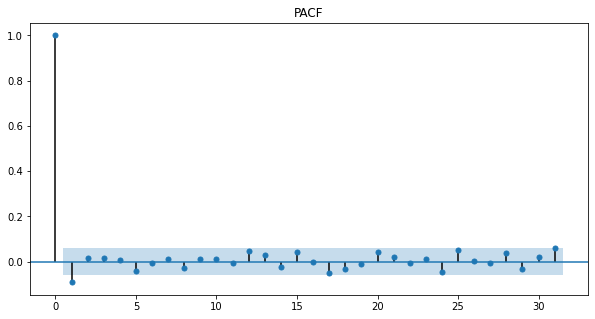

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import pacf, adfuller
from statsmodels.stats.diagnostic import acorr_ljungbox

fig, ax = plt.subplots(figsize=(10,5))
plot_pacf(btc["price_change_binary"], ax=ax, title="PACF");

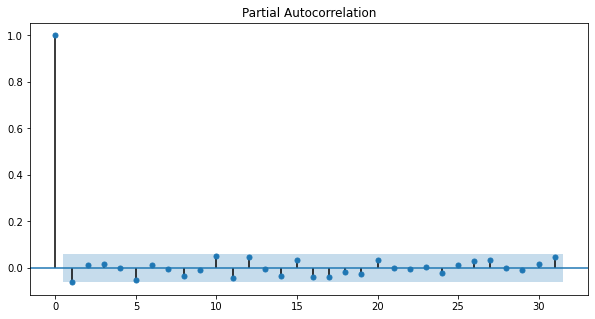

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
plot_pacf(eth["price_change_binary"], ax=ax);

In [ ]:
btc_corr = btc.corr(method='pearson')

In [ ]:
eth_corr = eth.corr(method='pearson')

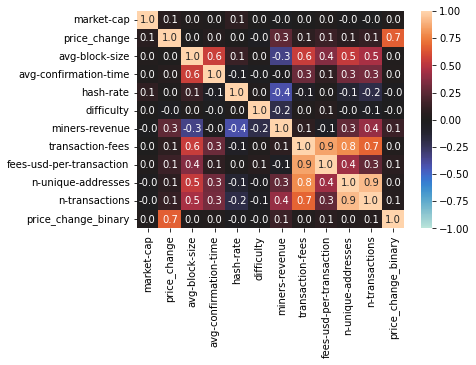

In [ ]:
import seaborn as sns
sns.heatmap(btc_corr,
            vmin=-1.0,
            vmax=1.0,
            center=0,
            annot=True, # True:格子の中に値を表示
            fmt='.1f',
            xticklabels=btc_corr.columns.values,
            yticklabels=btc_corr.columns.values
           )
plt.show()

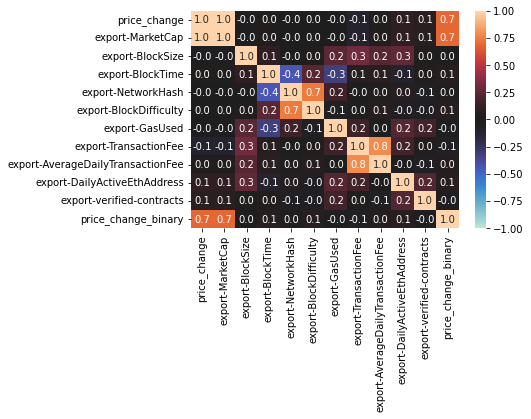

In [ ]:
sns.heatmap(eth_corr,
            vmin=-1.0,
            vmax=1.0,
            center=0,
            annot=True, # True:格子の中に値を表示
            fmt='.1f',
            xticklabels=eth_corr.columns.values,
            yticklabels=eth_corr.columns.values
           )
plt.show() 

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
print('Results of Dickey-Fuller Examination:')
# dftest = adfuller(df['diff_change'][1:], autolag='AIC')
dftest = adfuller(btc['market-cap'])
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
   dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Examination:
Test Statistic                  -31.276383
p-value                           0.000000
#Lags Used                        0.000000
Number of Observations Used    1092.000000
Critical Value (1%)              -3.436353
Critical Value (5%)              -2.864190
Critical Value (10%)             -2.568181
dtype: float64


In [ ]:
for column in btc.columns:
    print(column)
# dftest = adfuller(df['diff_change'][1:], autolag='AIC')
    btctest = adfuller(btc[column])
    dfoutput = pd.Series(btctest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in btctest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

market-cap
Test Statistic                  -31.276383
p-value                           0.000000
#Lags Used                        0.000000
Number of Observations Used    1092.000000
Critical Value (1%)              -3.436353
Critical Value (5%)              -2.864190
Critical Value (10%)             -2.568181
dtype: float64
price_change
Test Statistic                -1.544288e+01
p-value                        2.849754e-28
#Lags Used                     3.000000e+00
Number of Observations Used    1.089000e+03
Critical Value (1%)           -3.436369e+00
Critical Value (5%)           -2.864198e+00
Critical Value (10%)          -2.568185e+00
dtype: float64
avg-block-size
Test Statistic                -9.917831e+00
p-value                        3.046542e-17
#Lags Used                     2.200000e+01
Number of Observations Used    1.070000e+03
Critical Value (1%)           -3.436476e+00
Critical Value (5%)           -2.864245e+00
Critical Value (10%)          -2.568210e+00
dtype: float64

In [ ]:
for column in eth.columns:
    print(column)
# dftest = adfuller(df['diff_change'][1:], autolag='AIC')
    dftest = adfuller(eth[column])
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

price_change
Test Statistic                -9.750029e+00
p-value                        8.061894e-17
#Lags Used                     9.000000e+00
Number of Observations Used    1.083000e+03
Critical Value (1%)           -3.436403e+00
Critical Value (5%)           -2.864212e+00
Critical Value (10%)          -2.568193e+00
dtype: float64
export-MarketCap
Test Statistic                -9.751592e+00
p-value                        7.988977e-17
#Lags Used                     9.000000e+00
Number of Observations Used    1.083000e+03
Critical Value (1%)           -3.436403e+00
Critical Value (5%)           -2.864212e+00
Critical Value (10%)          -2.568193e+00
dtype: float64
export-BlockSize
Test Statistic                -8.904835e+00
p-value                        1.145284e-14
#Lags Used                     2.100000e+01
Number of Observations Used    1.071000e+03
Critical Value (1%)           -3.436470e+00
Critical Value (5%)           -2.864242e+00
Critical Value (10%)          -2.568209e+00